# Project #2
## Data Visualization (LECD) 2023/24

#### Students names: Mafalda Duarte e Rodrigo Santos

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.subplots as sp
from plotly.subplots import make_subplots
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount('/content/drive')
df = pd.read_csv("/content/drive/My Drive/vgsales.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Preparação dos Dados**

In [ ]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
# Verificar se há duplicados
df.duplicated().sum()

0

In [ ]:
# Nº de Linhas com valores em falta
print(df.isna().sum())

n_linhas = len(df[df.isna().any(axis=1)])
perc = (n_linhas / df.shape[0]) * 100

print(f"\nNúmero de linhas com valores em falta: {n_linhas} ------> {round(perc,2)}% das linhas do dataset ")

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Número de linhas com valores em falta: 307 ------> 1.85% das linhas do dataset 


In [ ]:
#df[df.isna().any(axis=1)]

In [ ]:
#Substituição de Alguns dos Dados em Falta

df.at[179, 'Year'] = 2003
df.at[377, 'Year'] = 2003
df.at[431, 'Year'] = 2008
df.at[470, 'Year'] = 2006
df.at[607, 'Year'] = 1978
df.at[16427, 'Year'] = 2004
df.at[16493, 'Year'] = 2011
df.at[624, 'Year'] = 2007
df.at[649, 'Year'] = 2001
df.at[652, 'Year'] = 2008
df.at[711, 'Year'] = 2006
df.at[16366, 'Year'] = 2010
df.at[782, 'Year'] = 2007
df.at[1126, 'Year'] = 2012
df.at[1133, 'Year'] = 2007
df.at[1303, 'Year'] = 1998
df.at[16327, 'Year'] = 2012
df.at[1433, 'Year'] = 2011
df.at[1498, 'Year'] = 2008
df.at[1513, 'Year'] = 1980
df.at[16307, 'Year'] = 2003
df.at[1585, 'Year'] = 1977
df.at[1649, 'Year'] = 2002
df.at[16246, 'Year'] = 2007
df.at[1697, 'Year'] = 2002
df.at[1837, 'Year'] = 2007
df.at[16229, 'Year'] = 2012
df.at[1990, 'Year'] = 1999
df.at[2019, 'Year'] = 1997
df.at[2086, 'Year'] = 2011
df.at[2113, 'Year'] = 1977
df.at[2114, 'Year'] = 2002
df.at[2134, 'Year'] = 2010
df.at[2173, 'Year'] = 2003
df.at[2145, 'Year'] = 2011
df.at[2295, 'Year'] = 2011
df.at[2415, 'Year'] = 2011
df.at[2422, 'Year'] = 2011
df.at[2484, 'Year'] = 2006
df.at[16058, 'Year'] = 2010
df.at[16065, 'Year'] = 2003
df.at[16191, 'Year'] = 2015
df.at[16194, 'Year'] = 2009
df.at[16198, 'Year'] = 2011
df.at[2497, 'Year'] = 2002
df.at[2528, 'Year'] = 2008
df.at[2586, 'Year'] = 2008
df.at[2776, 'Year'] = 2010
df.at[15876, 'Year'] = 2003
df.at[15878, 'Year'] = 2010
df.at[15900, 'Year'] = 2007
df.at[15915, 'Year'] = 2009
df.at[15915, 'Publisher'] = 'Zoo Games'
df.at[16057, 'Year'] = 2007
df.at[2786, 'Year'] = 2004
df.at[2838, 'Year'] = 2011
df.at[2947, 'Year'] = 2011
df.at[3049, 'Year'] = 2005
df.at[15697, 'Year'] = 2007
df.at[15717, 'Year'] = 2005
df.at[15739, 'Year'] = 2006
df.at[15865, 'Year'] = 2007
df.at[15811, 'Year'] = 2010
df.at[15652, 'Year'] = 2004
df.at[15606, 'Year'] = 2008
df.at[15579, 'Year'] = 2006
df.at[3238, 'Year'] = 2002
df.at[3217, 'Year'] = 2008
df.at[3141, 'Year'] = 2011
df.at[3194, 'Year'] = 2006
df.at[3346, 'Year'] = 2007
df.at[3421, 'Year'] = 2005
df.at[15197, 'Year'] = 2009
df.at[15208, 'Year'] = 2008
df.at[15261, 'Year'] = 2012
df.at[15316, 'Year'] = 2009
df.at[3468, 'Year'] = 2002
df.at[3501, 'Year'] = 2001
df.at[3715, 'Year'] = 2004
df.at[3753, 'Year'] = 2003
df.at[14942, 'Year'] = 2011
df.at[14997, 'Year'] = 2002
df.at[14998, 'Year'] = 2006
df.at[14999, 'Year'] = 2002
df.at[15476, 'Year'] = 2009
df.at[3880, 'Year'] = 1980
df.at[3952, 'Year'] = 2009
df.at[4145, 'Year'] = 2005
df.at[4151, 'Year'] = 1982
df.at[14696, 'Year'] = 2003
df.at[14849, 'Year'] = 2009
df.at[14855, 'Year'] = 2004
df.at[14876, 'Year'] = 2010
df.at[14925, 'Year'] = 2003
df.at[4199, 'Year'] = 2006
df.at[4232, 'Year'] = 1978
df.at[4330, 'Year'] = 2004
df.at[4378, 'Year'] = 1978
df.at[14377, 'Year'] = 2010
df.at[14473, 'Year'] = 2005
df.at[14522, 'Year'] = 2005
df.at[14583, 'Year'] = 2011
df.at[14676, 'Year'] = 2002
df.at[14098, 'Year'] = 2007
df.at[4380, 'Year'] = 2008
df.at[4469, 'Year'] = 1976
df.at[4472, 'Year'] = 2008
df.at[4536, 'Year'] = 2010
df.at[14087, 'Year'] = 2006
df.at[14160, 'Year'] = 2004
df.at[14273, 'Year'] = 2012
df.at[14296, 'Year'] = 2007
df.at[14312, 'Year'] = 2009
df.at[4683, 'Year'] = 2011
df.at[4791, 'Year'] = 2011
df.at[4797, 'Year'] = 2002
df.at[4858, 'Year'] = 2008
df.at[13870, 'Year'] = 2005
df.at[4865, 'Year'] = 2001
df.at[4934, 'Year'] = 2008
df.at[5061, 'Year'] = 1978
df.at[5078, 'Year'] = 2007
df.at[13733, 'Year'] = 2003
df.at[13962, 'Year'] = 2010
df.at[14046, 'Year'] = 2007
df.at[14055, 'Year'] = 2011
df.at[14056, 'Year'] = 2016
df.at[5162, 'Year'] = 2002
df.at[5171, 'Year'] = 2010
df.at[5195, 'Year'] = 2002
df.at[5196, 'Year'] = 2011
df.at[13278, 'Year'] = 2007
df.at[13477, 'Year'] = 2000
df.at[13665, 'Year'] = 2019
df.at[13672, 'Year'] = 1998
df.at[13675, 'Year'] = 2007
df.at[5240, 'Year'] = 2013
df.at[5508, 'Year'] = 1999
df.at[5618, 'Year'] = 2002
df.at[12915, 'Year'] = 2007
df.at[12922, 'Year'] = 2010
df.at[13055, 'Year'] = 2011
df.at[5669, 'Year'] = 2004
df.at[5625, 'Year'] = 2010
df.at[5657, 'Year'] = 1980
df.at[12807, 'Year'] = 2008  #145
df.at[13278, 'Publisher'] = 'Capcom'
df.at[13672, 'Publisher'] = 'Hudson'
df.at[470, 'Publisher']  ='THQ'
df.at[2222, 'Publisher'] = 'Sony Interactive Entertainment'
df.at[16229, 'Publisher'] = 'Ubisoft'
df.at[16494, 'Publisher'] = 'IDW'
df.at[16553, 'Publisher'] = 'Focus Home Interactive'
df.at[16191, 'Publisher'] = 'Gearbox Software'
df.at[16543, 'Publisher'] = 'Excalibur'
df.at[15353, 'Publisher'] = 'Giants Software'  #11



In [ ]:
print(df.isna().sum())

n_linhas = len(df[df.isna().any(axis=1)])
perc = (n_linhas / df.shape[0]) * 100

print(f"\nNúmero de linhas com valores em falta: {n_linhas} ------> {round(perc,2)}% das linhas do dataset ")

df.dropna(inplace=True)

Rank              0
Name              0
Platform          0
Year            126
Genre             0
Publisher        47
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

Número de linhas com valores em falta: 165 ------> 0.99% das linhas do dataset 


In [ ]:
print("ANTES\n")
print(df.dtypes)
print("\n")

# Mudar type do Ano para int :
df['Year'] = df['Year'].astype('int64')

print("DEPOIS\n")
print(df.dtypes)


ANTES

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


DEPOIS

Rank              int64
Name             object
Platform         object
Year              int64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


### Info Aux DataSet

Géneros: ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


Plataformas: ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


Publishers: 583



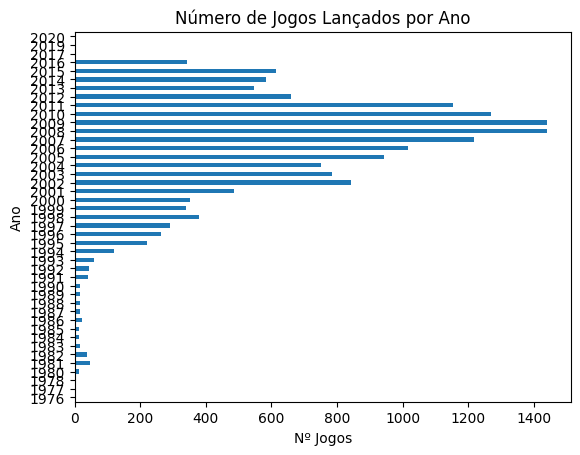

In [ ]:
gen = df['Genre'].unique()
print(f"Géneros: {gen}")
print("\n")

plat = df['Platform'].unique()
print(f"Plataformas: {plat}")
print("\n")

n_pubs = len(df['Publisher'].unique())
print(f"Publishers: {n_pubs}\n")


c = df['Year'].value_counts()
c = c.sort_index()

c.plot(kind='barh')

plt.xlabel('Nº Jogos')
plt.ylabel('Ano')
plt.title('Número de Jogos Lançados por Ano')
plt.show()

In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16433.000000,16433.000000,16433.000000,16433.000000,16433.000000,16433.000000,16433.000000
mean,8291.102964,2006.391347,0.266211,0.147682,0.078401,0.048446,0.541014
std,4805.512544,5.862585,0.820521,0.507725,0.310745,0.189489,1.562303
min,1.000000,1976.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4116.000000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8284.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12467.000000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## **Gráfico de Vendas por Região ao longo do Tempo**

In [ ]:
def vendas_regiao(df):
    na_sales = df.groupby("Year")["NA_Sales"].sum().reset_index()
    eu_sales = df.groupby("Year")["EU_Sales"].sum().reset_index()
    jp_sales = df.groupby("Year")["JP_Sales"].sum().reset_index()
    other_sales = df.groupby("Year")["Other_Sales"].sum().reset_index()
    global_sales = df.groupby("Year")["Global_Sales"].sum().reset_index()
    y_axis_range=[0,450]
    fig = sp.make_subplots(rows=3, cols=2, specs=[[{}, {}],[{}, {}],[{"colspan": 2}, None]],subplot_titles=('América do Norte', 'Europa', 'Japão', 'Outros','Global'),horizontal_spacing = 0.2, vertical_spacing=0.2)

    fig.add_trace(go.Scatter(x=na_sales["Year"], y=na_sales["NA_Sales"], mode='lines', line=dict(color='cornflowerblue')),row=1, col=1)
    fig.add_trace(go.Scatter(x=eu_sales["Year"], y=eu_sales["EU_Sales"], mode='lines', line=dict(color='mediumturquoise')),row=1, col=2)
    fig.add_trace(go.Scatter(x=jp_sales["Year"], y=jp_sales["JP_Sales"], mode='lines', line=dict(color='lightcoral')),row=2, col=1)
    fig.add_trace(go.Scatter(x=other_sales["Year"], y=other_sales["Other_Sales"], mode='lines', line=dict(color='plum')),row=2, col=2)
    fig.add_trace(go.Scatter(x=global_sales["Year"], y=global_sales["Global_Sales"], mode='lines', line=dict(color='darkseagreen')),row=3, col=1)

    fig.update_layout(showlegend=False)
    fig.update_layout(height=700, width=1000)

    for row in range(1, 4):
        for col in range(1, 3):
            fig.update_xaxes(title_text='Anos',title_font=dict(family='Arial', size=15, color='dimgrey'), row=row, col=col)
            fig.update_yaxes(title_text='Vendas (milhões)',title_font=dict(family='Arial', size=15, color='dimgrey'), row=row, col=col)
            if row != 3:
                fig.update_yaxes(range=y_axis_range, row=row, col=col)

    fig.update_layout(title=dict(text='Gráfico do número de vendas por região ao longo do tempo',x=0.5,font=dict(family='Arial Black', size=24, color='black')), plot_bgcolor='whitesmoke')

    fig.show()

vendas_regiao(df)

## **Gráfico de Vendas por Género ao longo do tempo**

In [ ]:
genre_year_sales = df.groupby(['Genre', 'Year'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']].sum().reset_index()
genre_year_sales = genre_year_sales.sort_values(by=['Genre', 'Year'])

c = px.colors.qualitative.Set3

color_dict = {
    'Sports': c[5],
    'Platform': c[1],
    'Racing': c[7],
    'Role-Playing': c[3],
    'Puzzle': c[4],
    'Misc': c[2],
    'Shooter': c[6],
    'Simulation': c[8],
    'Action': c[9],
    'Fighting': c[10],
    'Adventure': c[0],
    'Strategy': c[11]
}

def vendas_gen(df):
    fig = sp.make_subplots(rows=3, cols=2, specs=[[{}, {}],[{}, {}],[{"colspan": 2}, None]],subplot_titles=('América do Norte', 'Europa', 'Japão', 'Outros','Global'),horizontal_spacing = 0.2, vertical_spacing=0.2)

    regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales','Global_Sales']

    for i, region in enumerate(regions, 1):
        row = (i - 1) // 2 + 1
        col = (i - 1) % 2 + 1

        df = genre_year_sales[['Genre', 'Year', region]]

        for genre in df['Genre'].unique():
            genre_data = df[df['Genre'] == genre]
            color = color_dict[genre]
            trace = go.Bar(x=genre_data['Year'], y=genre_data[region], name=genre, marker_color=color, showlegend=False)
            fig.add_trace(trace, row=row, col=col)

    for row in range(1, 4):
        for col in range(1, 3):
            fig.update_xaxes(title_text='Ano',title_font=dict(family='Arial', size=15, color='dimgrey'), row=row, col=col)
            fig.update_yaxes(title_text='Vendas (milhões)',title_font=dict(family='Arial', size=15, color='dimgrey'), row=row, col=col)

    #Legenda
    for genre, color in color_dict.items():
        fig.add_trace(go.Scatter(x=[None], y=[None], marker=dict(size=10, color=color), mode='markers', name=genre))


    fig.update_layout(height=700, width=1000)
    fig.update_layout(barmode='stack')


    fig.update_layout(title=dict(text='Gráfico do número de vendas por género ao longo do tempo',x=0.5,font=dict(family='Arial Black', size=24, color='black')), plot_bgcolor='whitesmoke')

    fig.show()

vendas_gen(genre_year_sales)

## **Gráfico Top 6 Publishers**

In [ ]:
# Calcular as vendas globais por editora
df_pubcount = df.groupby(df['Publisher'])[['Global_Sales']].sum().rename(columns={'Global_Sales': 'Total_Sales'})

# Selecionar as 6 melhores editoras
top_6_publishers = df_pubcount.sort_values('Total_Sales', ascending=False).head(6)

def top6_pub(df):
    fig = px.pie(df, names=df.index, values='Total_Sales', color_discrete_sequence=px.colors.qualitative.Set2)
    fig.update_traces(textinfo="percent+label")

    fig.update_layout(height=700, width=1000)
    fig.update_layout(title=dict(text='Top 6 Publishers', x=0.5, font=dict(family='Arial Black', size=24, color='black')), plot_bgcolor='whitesmoke')

    fig.show()

top6_pub(top_6_publishers)

## **Gráfico Animado Vendas Globais das Top 6 publishers**

In [ ]:
pub = ['Nintendo', 'Electronic Arts', 'Activision', 'Sony Computer Entertainment','Ubisoft','Take-Two Interactive']

perc = df.loc[:, ['Year', 'Publisher', 'Global_Sales']]
perc['total_sales'] = perc.groupby([perc.Publisher, perc.Year])['Global_Sales'].transform('sum')
perc.drop('Global_Sales', axis=1, inplace=True)
perc = perc.sort_values("Year", ascending=False)
perc = perc.loc[perc['Publisher'].isin(pub)]
perc = perc.sort_values("Year")

all_combinations = pd.DataFrame([(year, p) for year in perc['Year'].unique() for p in pub], columns=['Year', 'Publisher'])
all_combinations = pd.merge(all_combinations, perc, on=['Year', 'Publisher'], how='left')
all_combinations.fillna(0, inplace=True)

def anim_global_top6(df):
    fig = px.bar(df, x='Publisher', y="total_sales", animation_frame="Year",
                animation_group="Publisher", color="Publisher", hover_name="Publisher", range_y=[0, 200],
                color_discrete_sequence=px.colors.qualitative.Set2)

    fig.update_layout(title=dict(text='Vendas Globais das Top 6 publishers',x=0.5,font=dict(family='Arial Black', size=24, color='black')), plot_bgcolor='whitesmoke')
    fig.update_yaxes(title_text='Vendas (milhões)',title_font=dict(family='Arial', size=15, color='dimgrey'))
    fig.update_xaxes(title_text='Publishers',title_font=dict(family='Arial', size=15, color='dimgrey'))
    fig.update_layout(barmode='stack', showlegend=False)
    fig.update_layout(bargap=0.2, bargroupgap=0.1)

    fig.show()

anim_global_top6(all_combinations)

## **Gráfico Linhas Vendas Globais das Top 6 publishers**

In [ ]:
publisher_year_sales = df.groupby(['Publisher', 'Year']).sum()['Global_Sales'].reset_index()

filtered_data = publisher_year_sales[publisher_year_sales['Publisher'].isin(pub)]

def vendas_globais_top6(df):
    fig = px.line(df, x='Year', y='Global_Sales', color='Publisher',color_discrete_sequence=px.colors.qualitative.Set2)

    fig.update_layout(title=dict(text='Gráfico Vendas Globais das Top 6 Publishers',x=0.5,font=dict(family='Arial Black', size=24, color='black')), plot_bgcolor='whitesmoke')
    fig.update_yaxes(title_text='Vendas (milhões)',title_font=dict(family='Arial', size=15, color='dimgrey'))
    fig.update_xaxes(title_text='Anos',title_font=dict(family='Arial', size=15, color='dimgrey'))
    fig.update_layout(legend=dict(title_text='Publisher',title_font=dict(family='Arial', size=15, color='dimgrey')))

    fig.show()

vendas_globais_top6(filtered_data)

<ipython-input-731-51bedfc40850>:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



## **Gráfico de Vendas e Jogos por Gênero e Ano para as Top 6 Publishers**

In [ ]:
# Dados para os pub mais relevantes
df_filtered = df[df['Publisher'].isin(pub) & (df['Year'] >= 2000)]

def vendas_jogos_ga_top6(df):
    fig = make_subplots(rows=len(pub), cols=1, subplot_titles=[f'{p}' for p in pub])

    x_axis_range = [1999, 2017]

    # 1º barra - género mais vendido
    # 2º barra - género mais publicado
    # 3º barra - jogo mais vendido

    for i, p in enumerate(pub, 1):

        pub_data = df[df['Publisher'] == p]

        # Dados por ano e gênero para obter os valores que queremos

        genre_sales = pub_data.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()
        most_sold_genre = genre_sales.loc[genre_sales.groupby('Year')['Global_Sales'].idxmax()]

        most_published_genre = pub_data.groupby(['Year', 'Genre']).size().reset_index(name='Count')
        most_published_genre = most_published_genre.loc[most_published_genre.groupby('Year')['Count'].idxmax()]

        most_sold_game = pub_data.loc[pub_data.groupby('Year')['Global_Sales'].idxmax()]

        fig.add_trace(go.Bar(x=most_sold_genre['Year'], y=most_sold_genre['Global_Sales'], marker_color=most_sold_genre['Genre'].map(color_dict),showlegend=False), row=i, col=1)
        fig.add_trace(go.Bar(x=most_published_genre['Year'], y=most_published_genre['Count'], marker=dict(color=most_published_genre['Genre'].map(color_dict), pattern=dict(shape='x')), showlegend=False), row=i, col=1)
        fig.add_trace(go.Bar(x=most_sold_game['Year'], y=most_sold_game['Global_Sales'], marker=dict(color=most_sold_game['Genre'].map(color_dict), pattern=dict(shape='-')), showlegend=False), row=i, col=1)

        fig.update_xaxes(range=x_axis_range, row=i, col=1)
        fig.update_yaxes(title_text='Vendas (milhões)',title_font=dict(family='Arial', size=12, color='dimgrey'), row=i, col=1)
        fig.update_xaxes(title_text='Anos',title_font=dict(family='Arial', size=12, color='dimgrey'), row=i, col=1)

     # Legendas
    for genre, color in color_dict.items():
        fig.add_trace(go.Scatter(x=[None], y=[None], marker=dict(size=10, color=color), mode='markers', name=genre))
    fig.add_trace(go.Bar(x=[None],y=[None],marker=dict(color='snow'), name='Género mais Vendido'))
    fig.add_trace(go.Bar(x=[None],y=[None],marker=dict(color='snow', pattern=dict(shape='x')), name='Género mais Produzido'))
    fig.add_trace(go.Bar(x=[None],y=[None],marker=dict(color='snow', pattern=dict(shape='-')), name='Género do Jogo mais Vendido'))

    fig.update_layout(height=1200)
    fig.update_layout(title=dict(text='Gráfico para Análise de Vendas e Jogos por Gênero e Ano para os Top 6 Publishers',x=0.5,font=dict(family='Arial Black', size=24, color='black')), plot_bgcolor='whitesmoke')

    fig.show()

vendas_jogos_ga_top6(df_filtered)

## **Treemap Género por plataforma**

In [ ]:
color_dict2 = {
    'Sports': c[5],
    'Platform': c[1],
    'Racing': c[7],
    'Role-Playing': c[3],
    'Puzzle': c[4],
    'Misc': c[2],
    'Shooter': c[6],
    'Simulation': c[8],
    'Action': c[9],
    'Fighting': c[10],
    'Adventure': c[0],
    'Strategy': c[11],
    '(?)': 'linen',
}

def genero_plat(df):
    fig = px.treemap(df, path=[px.Constant('All'), 'Platform', 'Genre'], values='Global_Sales',color='Genre', color_discrete_map=color_dict2)


    fig.update_layout(title=dict(text='Treemap Género por Plataforma',x=0.5,font=dict(family='Arial Black', size=24, color='black')), plot_bgcolor='whitesmoke')
    fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    fig.update_layout(height=700, width=1000)
    fig.show()

genero_plat(df)

## **Mapa Calor Popularidade de Géneros de Jogos ao Longo do Tempo**

In [ ]:
genre_sales = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().unstack().fillna(0)

def heat_pop_gen(df):
    fig = px.imshow(df, x=df.columns, y=df.index, color_continuous_scale = 'Sunset' , labels=dict(color='Vendas (milhões)'))

    fig.update_layout(title=dict(text='Popularidade de Géneros de Jogos ao Longo do Tempo',x=0.5,font=dict(family='Arial Black', size=24, color='black')), plot_bgcolor='whitesmoke')
    fig.update_yaxes(title_text='Anos',title_font=dict(family='Arial', size=15, color='dimgrey'))
    fig.update_xaxes(title_text='Género',title_font=dict(family='Arial', size=15, color='dimgrey'))

    fig.show()

heat_pop_gen(genre_sales)

## **Gráfico Vendas por Região e Plataforma**

In [ ]:
# Juntar por plataforma e calcular as vendas totais de cada um
sales_by_region_platform = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum().reset_index()


organized_df = pd.DataFrame({'Platform': np.repeat(sales_by_region_platform['Platform'], 4), 'Region': np.tile(['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], len(sales_by_region_platform)), 'Sales (Millions)': sales_by_region_platform[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].values.flatten()})

def vendas_reg_plat(df):
    fig = px.bar(organized_df, x='Platform', y='Sales (Millions)', color='Region', color_discrete_map={'NA_Sales': 'cornflowerblue', 'EU_Sales': 'mediumturquoise', 'JP_Sales': 'lightcoral', 'Other_Sales': 'plum'}, labels={'Sales (Millions)': 'Vendas (Milhões)', 'Platform': 'Plataforma', 'Region': 'Região'}, title='Vendas por Região e Plataforma', height=600)

    fig.update_yaxes(title_text='Vendas (milhões)',title_font=dict(family='Arial', size=15, color='dimgrey'))
    fig.update_xaxes(title_text='Plataforma',title_font=dict(family='Arial', size=15, color='dimgrey'))
    fig.update_layout(title=dict(text='Vendas por Região e Plataforma', x=0.5, font=dict(family='Arial Black', size=24, color='black')), barmode='group',plot_bgcolor='whitesmoke')
    fig.update_layout(legend=dict(title_text='Região',title_font=dict(family='Arial', size=15, color='dimgrey')))

    fig.show()

vendas_reg_plat(organized_df)

## **Mapa Calor Vendas por Géneros e Região**

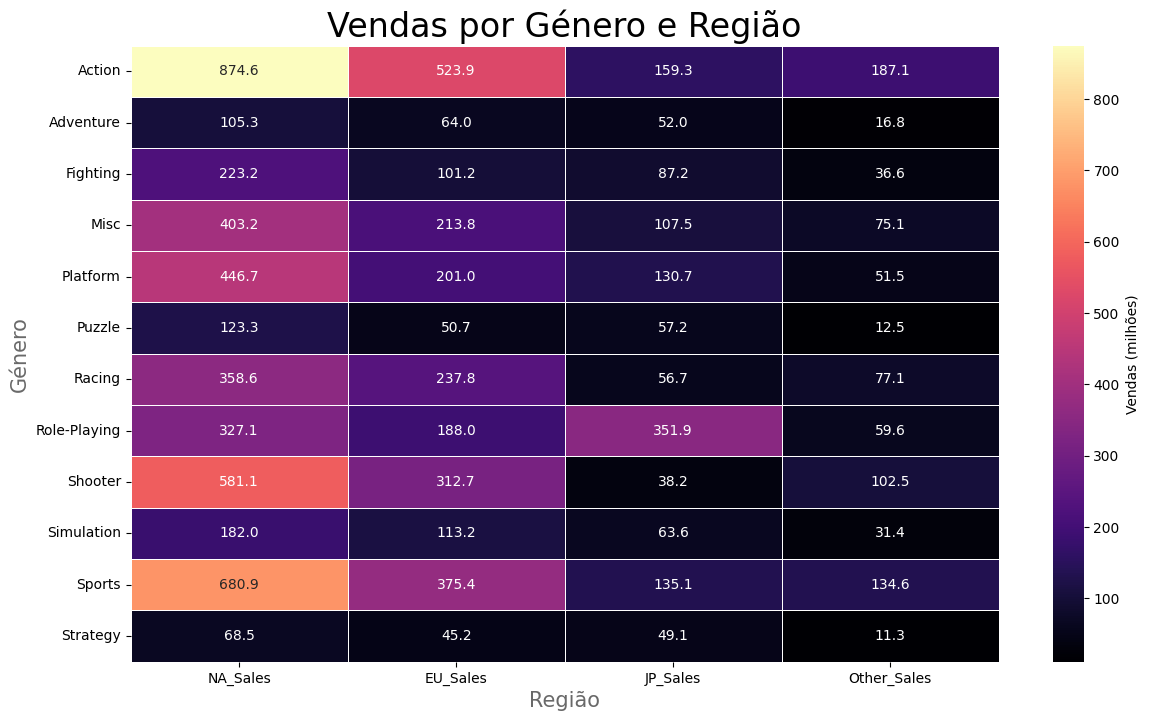

In [ ]:
sales_by_genre_region = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
def gen_reg(df):
    plt.figure(figsize=(14, 8))
    heatmap = sns.heatmap(df, annot=True, linewidth=.5, fmt=".1f", cbar_kws={'label': 'Vendas (milhões)'},cmap='magma')
    plt.title('Vendas por Género e Região', fontdict = dict(family='DejaVu Sans', size=24, color='black'))
    heatmap.set_xlabel('Região', fontdict=dict(family='DejaVu Sans', size=15, color='dimgrey'))
    heatmap.set_ylabel('Género', fontdict=dict(family='DejaVu Sans', size=15, color='dimgrey'))
    plt.show()

gen_reg(sales_by_genre_region)

## **Bubble Graph Melhores 50 Jogos**

In [ ]:
df_selected = df[['Name', 'Global_Sales', 'Platform', 'Year', 'Genre']]

df_games = df_selected.groupby('Name').agg({ 'Global_Sales': 'sum', 'Platform': pd.Series.nunique, 'Year': 'first', 'Genre': 'first'}).reset_index()

df_games = df_games.rename(columns={'Platform': 'Num_Platforms'})

df_games_sorted = df_games.sort_values(by='Global_Sales', ascending=False)
df_top_50 = df_games_sorted.head(50)

df_top_50['Color'] = df_top_50['Genre'].map(color_dict)

def top_50_global(df):
    fig = go.Figure()

    for game in df['Name']:

        info_game = df[df['Name'] == game].iloc[0]
        fig.add_trace(go.Scatter(x=[info_game['Year']], y=[info_game['Global_Sales']], mode='markers', marker=dict(size=info_game['Num_Platforms'] * 8, color=info_game['Color'], opacity=0.7, line=dict(width=0.4, color='black')),text=info_game['Name'], hoverinfo='text', showlegend=False))

    # Legenda
    for genre, color in color_dict.items():
        fig.add_trace(go.Scatter(x=[None], y=[None], marker=dict(size=10, color=color), mode='markers', name=genre))

    nota = "Tamanho das bolhas é proporcional ao número de plataformas "
    fig.add_annotation(go.layout.Annotation( text=nota, align='left', showarrow=False, xref='paper', yref='paper', x=0.02, y=1,font=dict(size=12, color='gray')))

    fig.update_layout( title=dict(text='Top 50 Jogos com Mais Vendas Globais', x=0.5, font=dict(family='Arial Black', size=24, color='black')), plot_bgcolor='whitesmoke')
    fig.update_yaxes(title_text='Vendas Globais (milhões)', title_font=dict(family='Arial', size=15, color='dimgrey'))
    fig.update_xaxes(title_text='Ano', title_font=dict(family='Arial', size=15, color='dimgrey'))

    fig.show()

top_50_global(df_top_50)

<ipython-input-737-f90b0337fba9>:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## **Vendas por Região dos Top 50 Jogos**

In [ ]:
df_top_50['Rank'] = range(1, 51)

region_sales = df.groupby('Name')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Estamos a juntar todas as linhas do dataframe à esquerda (df_top_50) e as linhas correspondentes do dataframe à direita (region_sales)
df_top_50 = pd.merge(df_top_50, region_sales, on='Name', how='left')

colors = {
    'NA_Sales': 'cornflowerblue',
    'EU_Sales': 'mediumturquoise',
    'JP_Sales': 'lightcoral',
    'Other_Sales': 'plum',
}

def top_50_rank_reg(df):
    fig = px.line(df, x='Rank', y=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], markers=True, hover_data={'Name': True}, line_shape="linear", color_discrete_map=colors)

    fig.update_layout( title=dict(text='Vendas dos Top 50 jogos por Região', x=0.5, font=dict(family='Arial Black', size=24, color='black')), plot_bgcolor='whitesmoke')
    fig.update_yaxes(title_text='Vendas (milhões)', title_font=dict(family='Arial', size=15, color='dimgrey'))
    fig.update_xaxes(title_text='Rank', title_font=dict(family='Arial', size=15, color='dimgrey'))
    fig.update_layout(legend=dict(title_text='Região',title_font=dict(family='Arial', size=15, color='dimgrey')))
    fig.show()

top_50_rank_reg(df_top_50)

<ipython-input-738-9937fd17ac4e>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

